<a href="https://colab.research.google.com/github/AchmadFauziTrinanda/digitalskola_ds11/blob/master/Basic_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
`# Ini diformat sebagai kode`
```

#***Basic Statistics***
Basic Statistics

by : Achmad Fauzi Trinanda

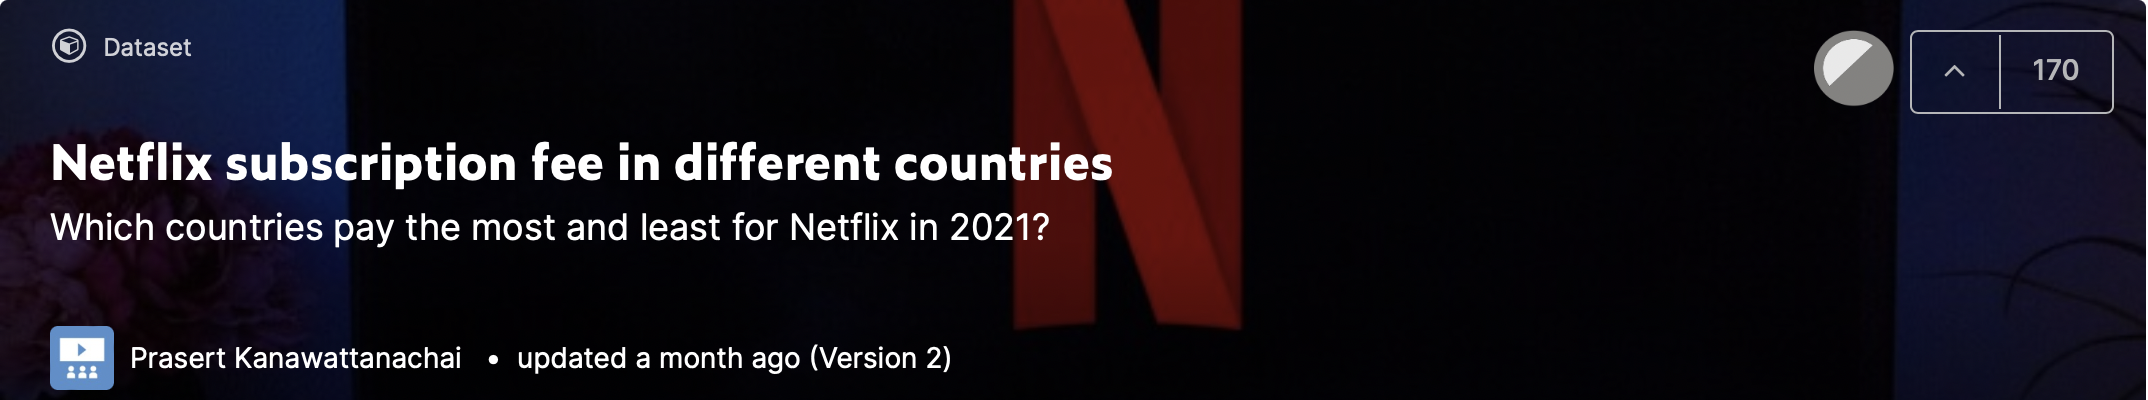

make data visualization from the database above from kaggle.

#Import Libraries

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

sns.set_style('whitegrid')
plt.rc('patch', edgecolor='black')
sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 1.5})

#Read Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving netflix price in different countries.csv to netflix price in different countries.csv


In [ ]:
import io
df_main = pd.read_csv(io.BytesIO(uploaded['netflix price in different countries.csv']))
df_main.head()

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,Argentina,4760,3154,1606,3.74,6.30,9.26
1,Austria,5640,3779,1861,9.03,14.67,20.32
2,Bolivia,4991,3155,1836,7.99,10.99,13.99
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54
4,Chile,4994,3156,1838,7.07,9.91,12.74


In [ ]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        65 non-null     object 
 1   Total Library Size             65 non-null     int64  
 2   No. of TV Shows                65 non-null     int64  
 3   No. of Movies                  65 non-null     int64  
 4   Cost Per Month - Basic ($)     65 non-null     float64
 5   Cost Per Month - Standard ($)  65 non-null     float64
 6   Cost Per Month - Premium ($)   65 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 3.7+ KB


#Pivot Table

In [ ]:
df_main["country_level"] = df_main['Cost Per Month - Standard ($)'].apply(lambda x: "Low" if x < 10 else ("Medium" if x < 15 else "High"))
df_main.head()

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),country_level
0,Argentina,4760,3154,1606,3.74,6.30,9.26,Low
1,Austria,5640,3779,1861,9.03,14.67,20.32,Medium
2,Bolivia,4991,3155,1836,7.99,10.99,13.99,Medium
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54,Medium
4,Chile,4994,3156,1838,7.07,9.91,12.74,Low


In [ ]:
pd.pivot_table(df_main, index=["country_level"],
               aggfunc={'Cost Per Month - Standard ($)':['max','min','mean']})

Cost Per Month - Standard ($)                  
                                        max       mean    min
country_level                                                
High                                  20.46  16.915000  15.04
Low                                    9.91   7.327778   3.00
Medium                                14.67  12.238200  10.00

From the pivot table we know the range of CPM in every category :
- High : less than 10 dollars
- Medium : 10-15 dollars
- High : more than 15 dollars

#Correlation Heatmap

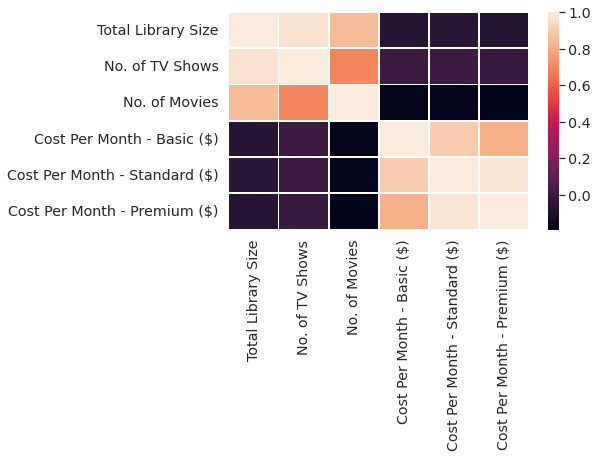

In [ ]:
corr = df_main.corr()
sns.heatmap(corr,vmax=1,linewidths = 0.8)
plt.show()

From the correlation heatmap it is known there is no correlation between CPM and number of library in every country

#Pairplot

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


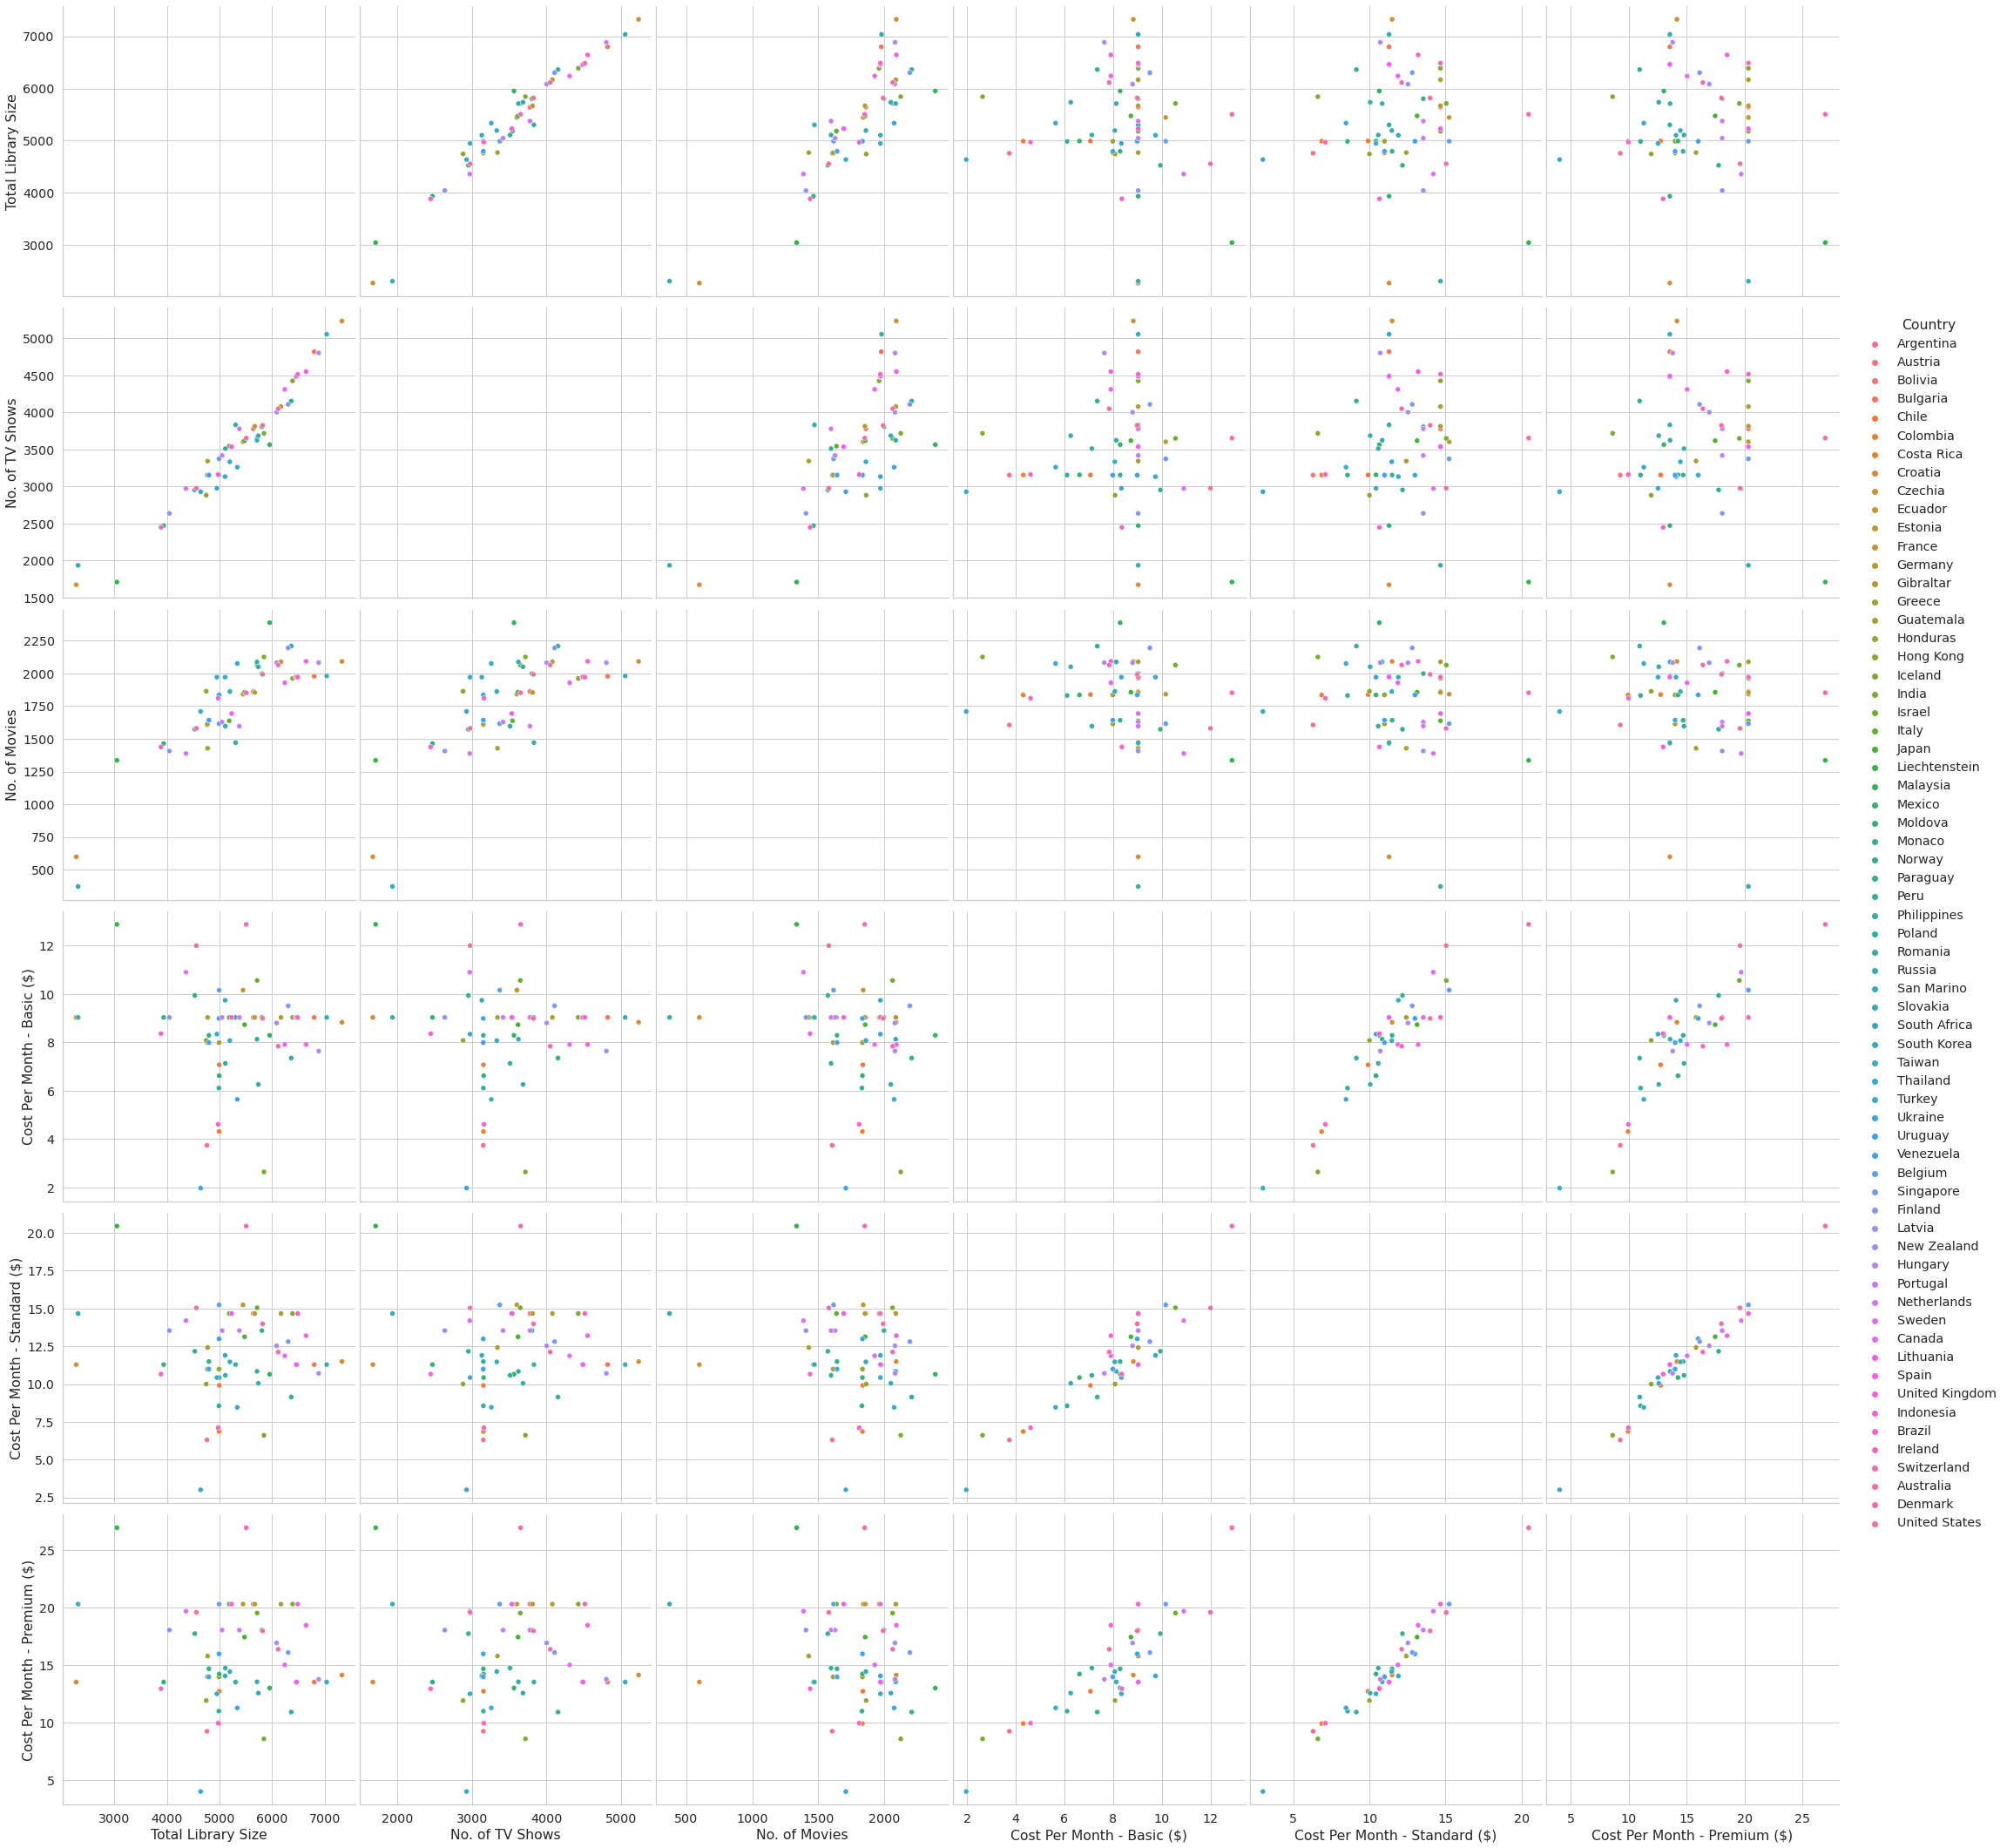

In [ ]:
sns.pairplot(df_main, hue='Country', size=5);

This graph visualize the correlation from heatmap

#Bar Chart

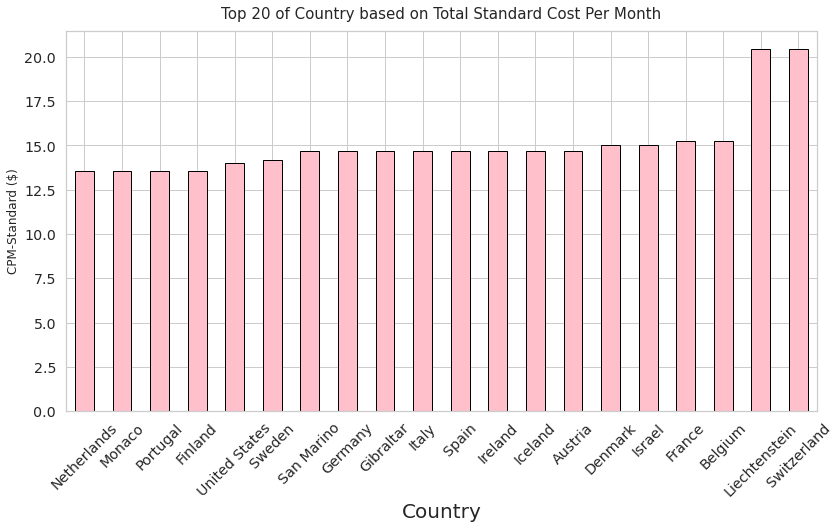

In [ ]:
plt.figure(figsize = (12,7))
top_country = df_main['Country'][:65]
chart = df_main.groupby(top_country)['Cost Per Month - Standard ($)'].sum().sort_values(ascending = False).iloc[19::-1].plot(kind = 'bar', color = 'pink')

chart.set_xticklabels(chart.get_xticklabels(), rotation = 45)
plt.title('Top 20 of Country based on Total Standard Cost Per Month', fontsize = 15, pad = 12)
plt.xlabel('Country', fontsize = 20)
plt.ylabel('CPM-Standard ($)', fontsize = 12)
plt.show()

It is found that Switzerland and Liechtenstein have the highest CPM. We also know how expensive their daily life cost

#Scatter Plot

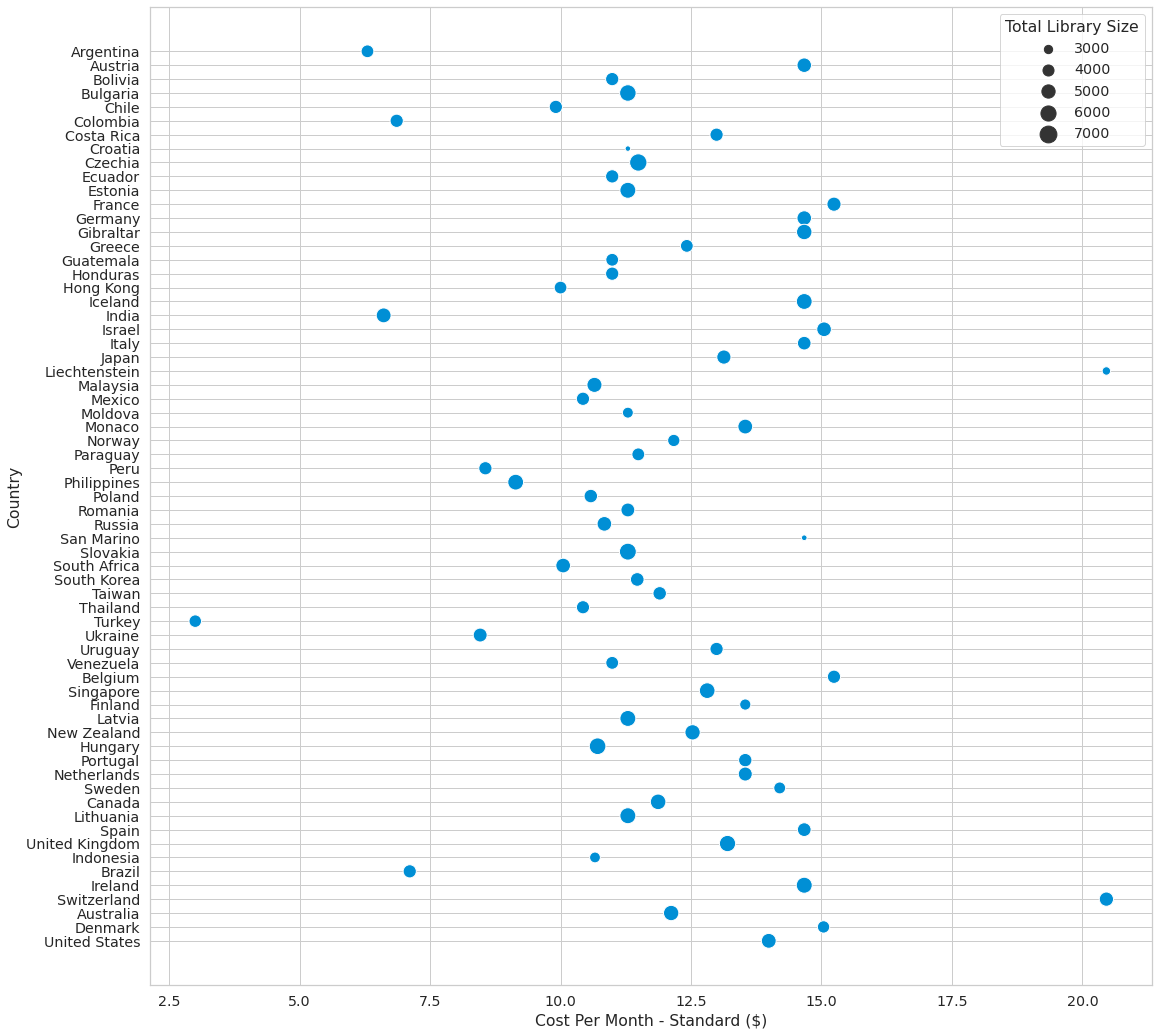

In [ ]:
plt.figure(figsize=(16,18))
sns.scatterplot(data=df_main, x='Cost Per Month - Standard ($)', y='Country', size='Total Library Size', palette='cmap', sizes=(30, 300))

This scatter plot make sure that the more you pay for CPM, it doesn't mean you have higher number of library even turkey which has the lowest CPM has more library size than Liechtenstein.

#Point Plot (Line)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


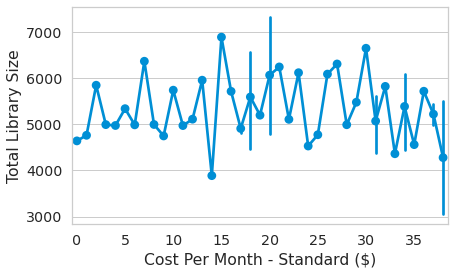

In [ ]:
ax = sns.pointplot('Cost Per Month - Standard ($)','Total Library Size',data=df_main)

x = np.random.randint(0,20,size=(100))
y = np.random.rand(100)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

plt.show()

the line plot shows how fluctuative the correlation between CPM and total library size

#Histogram (Distribution Plot)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness : 0.04006871590274466


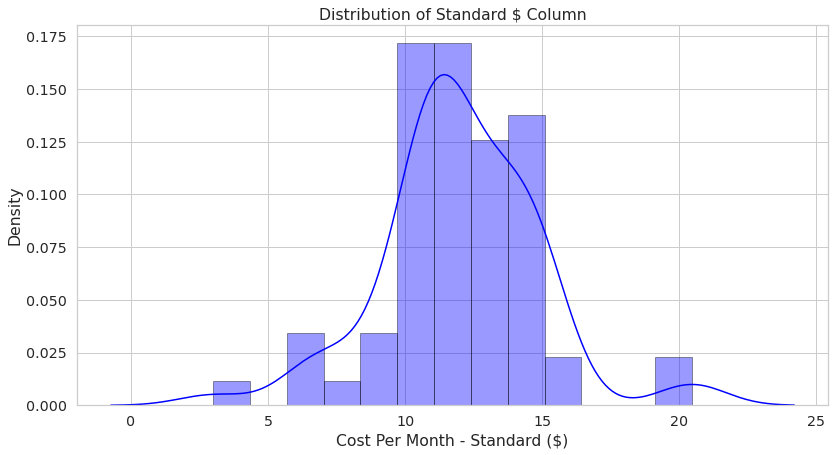

In [ ]:
plt.figure(figsize = (12,7))
plt.title('Distribution of Standard $ Column')
sns.distplot(df_main['Cost Per Month - Standard ($)'],color = 'blue')
print("Skewness :", df_main['Cost Per Month - Standard ($)'].skew())
plt.show()

The histogram shows how the data distributed. The skewness is 0.04, it means the data almost distributed normally

#Box Plot

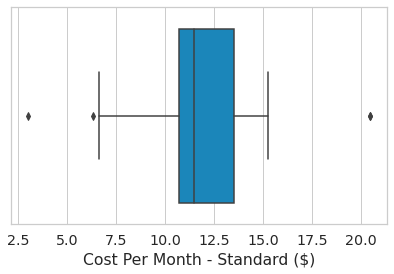

In [ ]:
sns.boxplot(x=df_main['Cost Per Month - Standard ($)'])

The Boxplot show outliers in the minimum (Turkey) and maximum (Switzerland and Liechtenstein) CPM

**Conclusion**

- The data shows how much the CPM in every country. We found that there is no correlation between total of library size with CPM. Turkey pay the cheapest CPM but has larger library than Liechenstein.

- This finding would be better if we know the customer behavior in every country. Maybe netflix gives turkey more library because the customer there has more different preferences than the Liechtenstein 